**Machine Learning Project**


*   Dataset: Indicators of Heart Disease (2022 UPDATE)
*   Problem: Classification
*   We want to use this dataset to train a model that classifies new instances
on the heart disease variable
*  We will use input features like BMI, Smoking, Alcohol Consumption, Physical
Health,  Mental Health, Sex, Age, etc to determine whether or not the
individual has had heart disease
*   Model can be used to determine if an individual is at risk of heart disease

**Load the Dataset**

In [16]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

path= "/content/heart_2020_cleaned.csv"
import pandas as pd
df = pd.read_csv(path)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [17]:
df.info

<bound method DataFrame.info of        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  A

Data Information:


*   HeartDisease - whether or not the individual has had heart disease.
*  BMI - a value that allows you to assess the degree of correspondence between a person's mass and his height.
*  Smoking- whether or not the individual smokes. Smoking increases blood pressure, fibrinogen and platelet levels, making blood clots more likely.
*  AlcoholDrinking - whether or not the individual drinks alcohol. Alcohol causes not only temporary disturbances in the functioning of the heart, but also permanent ones.
*  Stroke - whether or not the person has had a stroke. The cause of stroke in heart disease is thromboembolism, when clots form in the cavities of the heart (most often with heart failure).
* PhysicalHealth - how many days in a month did the individual feel poor physical health.
* MentalHealth - how many days in a month did the individual feel poor mental health.
* DiffWalking - whether or not the individual has difficulty climbing stairs.
* Sex - gender
* AgeCategory - age category of the subjects.
* Race- the individual's race.
* Diabetic - whether or not the person is diabetic.
* PhysicalActivity - adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
* GenHealth - the individual's well-being.
* SleepTime - number of hours of sleep.
* Asthma- whether or not they have asthma
* KidneyDisease - whether or not they have had kidney disease.
* Skin Cancer - whether or not they have had skin cancer.



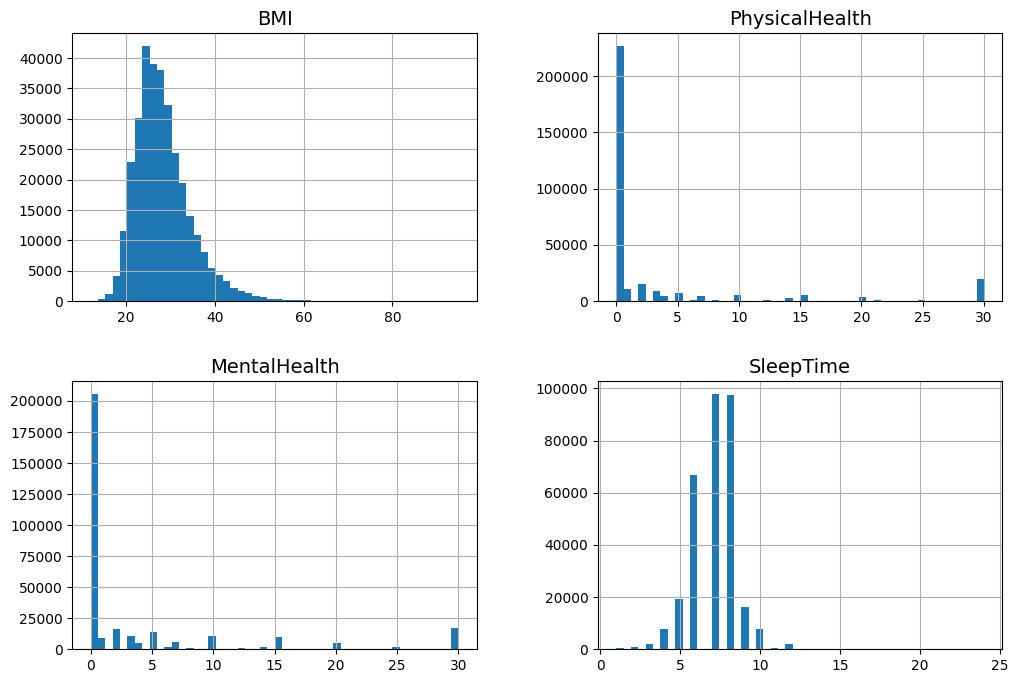

In [18]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))

#shows plots for numerical data
plt.show()

Many of the distributions are skewed right. A possible improvement we could make in the future is to tranform the skewed distributions by replacing the feature with its square root.  

**Clean and Transform the Data:**


1.   We will impute data for missing values using simple imputer
2.   We will transform categorical variables to numeral values using either ordinal encoder or one hot encoder

3.   We will scale data of numerical variables using standard scalar






In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

cat_pipeline_non_ordinal = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("one_hot", OneHotEncoder(sparse=False)),
])

cat_pipeline_ordinal = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder()),
])

In [20]:

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [21]:
numerical_variables= ['BMI',
  'PhysicalHealth',
  'MentalHealth',
  'SleepTime']

#grouped the binary variables as ordinal categorical because it is logical to specify them as either 0 or 1 rather than creating additional columns using one-hot-encoder
categorical_variables_ordinal= ['HeartDisease', 'AgeCategory', 'GenHealth', 'Smoking', 'AlcoholDrinking',
                                   'Stroke', 'DiffWalking', 'Diabetic',
                                   'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer' ]
categorical_variables_non_ordinal=['Sex', 'Race']


In [22]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer([
    ("num", num_pipeline, numerical_variables),
    ("cat_ordinal", cat_pipeline_ordinal, categorical_variables_ordinal),
    ("cat_non_ordinal", cat_pipeline_non_ordinal, categorical_variables_non_ordinal)
])

In [23]:
df_prepared=preprocessing.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
df_prepared.shape

(319795, 24)

In [25]:
cleaned_df=pd.DataFrame(df_prepared,columns=preprocessing.get_feature_names_out(),
    index=df.index)
cleaned_df

,num__BMI,num__PhysicalHealth,num__MentalHealth,num__SleepTime,cat_ordinal__HeartDisease,cat_ordinal__AgeCategory,cat_ordinal__GenHealth,cat_ordinal__Smoking,cat_ordinal__AlcoholDrinking,cat_ordinal__Stroke,...,cat_ordinal__KidneyDisease,cat_ordinal__SkinCancer,cat_non_ordinal__Sex_Female,cat_non_ordinal__Sex_Male,cat_non_ordinal__Race_American Indian/Alaskan Native,cat_non_ordinal__Race_Asian,cat_non_ordinal__Race_Black,cat_non_ordinal__Race_Hispanic,cat_non_ordinal__Race_Other,cat_non_ordinal__Race_White
0,-1.844750,-0.046751,3.281069,-1.460354,0.0,7.0,4.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,-0.067601,0.0,12.0,4.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.628776,0.0,9.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.647473,-0.424070,-0.490039,-0.763977,0.0,11.0,2.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.726138,3.097572,-0.490039,0.628776,0.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,-0.144019,0.456341,-0.490039,-0.763977,1.0,8.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
319791,0.238291,-0.424070,-0.490039,-1.460354,0.0,3.0,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
319792,-0.642753,-0.424070,-0.490039,-0.763977,0.0,5.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319793,0.705560,-0.424070,-0.490039,3.414282,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Now, we have completed cleaning and transforming the dataset. The next step is to split into training/testing/validation sets and begin training the model

Analyze Cleaned Data:

In [26]:
corr_matrix = cleaned_df.corr(numeric_only=True)
corr_matrix["cat_ordinal__HeartDisease"].sort_values(ascending=False)

cat_ordinal__HeartDisease                               1.000000
cat_ordinal__AgeCategory                                0.233432
cat_ordinal__DiffWalking                                0.201258
cat_ordinal__Stroke                                     0.196835
num__PhysicalHealth                                     0.170721
cat_ordinal__Diabetic                                   0.168553
cat_ordinal__KidneyDisease                              0.145197
cat_ordinal__Smoking                                    0.107764
cat_ordinal__SkinCancer                                 0.093317
cat_non_ordinal__Sex_Male                               0.070040
num__BMI                                                0.051803
cat_ordinal__Asthma                                     0.041444
cat_non_ordinal__Race_White                             0.040121
num__MentalHealth                                       0.028591
cat_non_ordinal__Race_American Indian/Alaskan Native    0.008547
num__SleepTime           

Since the Age Category has the strongest correlation to the Heart Disease variable, we will stratify our data based on this variable

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test = train_test_split(
    cleaned_df, test_size=0.2, stratify=cleaned_df['cat_ordinal__AgeCategory'], random_state=42)

y_train= x_train['cat_ordinal__HeartDisease']
y_test= x_test['cat_ordinal__HeartDisease']
x_train.drop('cat_ordinal__HeartDisease',axis=1,inplace=True)
x_test.drop('cat_ordinal__HeartDisease',axis=1,inplace=True)


**Train Model Using SGDClassifier:**

In [29]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

SGDClassifier(random_state=42)

Measure the model using accuracy, precision, and recall:

In [30]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = sgd_clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_str)

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     58523
         1.0       0.00      0.00      0.00      5436

    accuracy                           0.92     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.84      0.92      0.87     63959



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This model gives us about 92% accuracy in predicting whether or not the individual has had heart disease. However, high accuracy is explained by a large proportion of healthy people. When dealing with imbalanced classes, we care more about precision and recall as a measure of how well the model works because high precision indicates fewer false positives and high recall indicates fewer false negatives. This is more valuable for detecting whether or not a person has heart disease.

For this model, both precision and recall for a classification of 1.0 (the individual has heart disease) are 0. This means that this model is probably not the best predictor for our project.

**Train Model Using RandomForestClassifier:**

In [31]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

Random_Forest_Classifier = RandomForestClassifier(random_state=42)
Random_Forest_Classifier.fit(x_train, y_train)
y_pred = Random_Forest_Classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_str)

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     58523
         1.0       0.34      0.11      0.16      5436

    accuracy                           0.91     63959
   macro avg       0.63      0.54      0.56     63959
weighted avg       0.87      0.91      0.88     63959



Using the Random Forest classifier gives us about 91% accuracy. However, precision and recall are much higher than when we used the SGDClassifier (34% and 11% respectively). Thus, this model is better for training our dataset. Let's see if we can continue to improve as we train our models!

One method we haven't used yet is grid search. Let's see if we can use grid search to find the optimal parameters for the Random Forest Classifier.

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to train the final model
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(x_train, y_train)

y_pred_best = best_rf_classifier.predict(x_test)

# Evaluate the model with the best parameters
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_report_best = classification_report(y_test, y_pred_best)

# Print the results for the model
print(f"Accuracy: {accuracy_best:.2f}")
print("Classification Report:")
print(classification_report_best)

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     58523
         1.0       0.57      0.06      0.10      5436

    accuracy                           0.92     63959
   macro avg       0.75      0.53      0.53     63959
weighted avg       0.89      0.92      0.88     63959



Using grid search gives us a slight improvement in accuracy with 92%. It also gives us a significant improvement in precision- 57% as opposed to 34% without using grid search. However, recall is lower using this model (only %6). Thus, this model would be the best to use if we care more about precision than recall.

Although, we have made significant improvements in our model. Another approach we can try is using an SVM. Let's see if using an SVM classifier will yield better results than our RandomForestClassifier.

**Train the model using an SVM Classifier**

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(random_state=42)
svm_classifier.fit(x_train, y_train)
y_pred_svm = svm_classifier.predict(x_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

# Print the results for the SVM model
print("Results for SVM Classifier:")
print(f"Accuracy: {accuracy_svm:.2f}")
print("Classification Report:")
print(classification_report_svm)

Results for SVM Classifier:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     58523
         1.0       0.00      0.00      0.00      5436

    accuracy                           0.92     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.84      0.92      0.87     63959



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As you can see, this model yields the same results as our first model, the SGD Classifier. Although accuracy is 92%, precision and recall are both 0 for predicting the heart disease variable. Thus, this model is not a good fit for our data.

After training 3 different models, we have decided that using the RandomForestClassifier yields the best results based on our dataset. Moving forwards, we can use this model to make predictions based on new instances.